In [1]:
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/Users/thomassimmons/c/d/datasets/retail_store_sales.csv")

In [4]:
df.shape

(12575, 11)

In [17]:
df.isnull().sum()

transaction_id      0
customer_id         0
category            0
item                0
price_per_unit      0
quantity            0
total_spent         0
payment_method      0
location            0
transaction_date    0
discount_applied    0
dtype: int64

In [12]:
df.columns

Index(['transaction_id', 'customer_id', 'category', 'item', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location',
       'transaction_date', 'discount_applied'],
      dtype='object')

In [11]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [16]:
df = df.dropna(subset = ['item', 'price_per_unit', 'quantity', 'total_spent', 'discount_applied'])

In [18]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

/var/folders/kf/nt6wlgn90dvc9wsk7ttkqs4w0000gn/T/ipykernel_43368/3405637112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')


In [22]:
df['month'] = df['transaction_date'].dt.to_period('M')

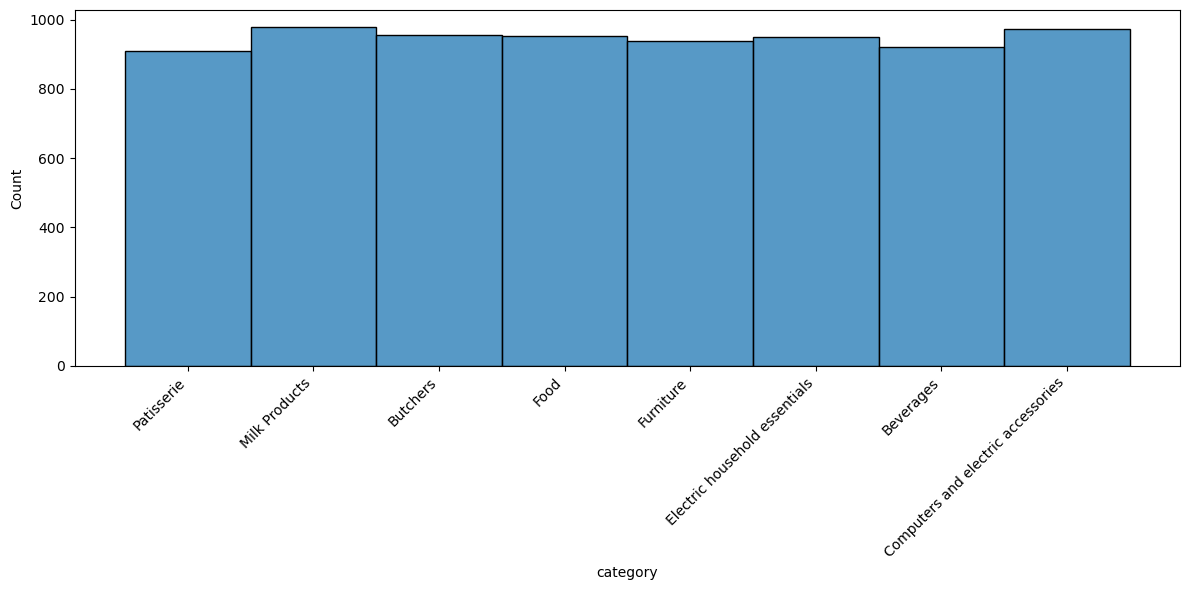

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df['category'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
print("Dataframe columns:\n", df.columns)
print("\nData types:\n", df.dtypes)

Dataframe columns:
 Index(['transaction_id', 'customer_id', 'category', 'item', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location',
       'transaction_date', 'discount_applied', 'month'],
      dtype='object')

Data types:
 transaction_id              object
customer_id                 object
category                    object
item                        object
price_per_unit             float64
quantity                   float64
total_spent                float64
payment_method              object
location                    object
transaction_date    datetime64[ns]
discount_applied            object
month                    period[M]
dtype: object


In [36]:
df.describe(include='all')

,transaction_id,customer_id,category,item,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied,month
count,7579,7579,7579,7579,7579.000000,7579.000000,7579.000000,7579,7579,7579,7579,7579
unique,7579,25,8,200,NaN,NaN,NaN,3,2,NaN,2,37
top,TXN_6867343,CUST_05,Milk Products,Item_11_MILK,NaN,NaN,NaN,Cash,Online,NaN,True,2022-01
freq,1,352,979,80,NaN,NaN,NaN,2583,3835,NaN,3801,242
mean,NaN,NaN,NaN,NaN,23.428882,5.557329,130.427893,NaN,NaN,2023-07-11 13:57:42.250956544,NaN,NaN
min,NaN,NaN,NaN,NaN,5.000000,1.000000,5.000000,NaN,NaN,2022-01-01 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,NaN,14.000000,3.000000,52.000000,NaN,NaN,2022-09-27 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,NaN,23.000000,6.000000,110.000000,NaN,NaN,2023-07-09 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,NaN,33.500000,8.000000,192.000000,NaN,NaN,2024-04-28 00:00:00,NaN,NaN
max,NaN,NaN,NaN,NaN,41.000000,10.000000,410.000000,NaN,NaN,2025-01-18 00:00:00,NaN,NaN


In [37]:
df.isnull().sum()

transaction_id      0
customer_id         0
category            0
item                0
price_per_unit      0
quantity            0
total_spent         0
payment_method      0
location            0
transaction_date    0
discount_applied    0
month               0
dtype: int64

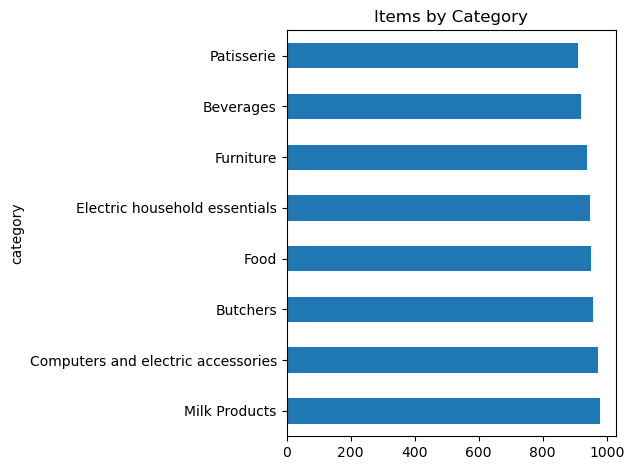

In [42]:
df['category'].value_counts().plot(kind='barh', title='Items by Category')
plt.tight_layout()
plt.show()

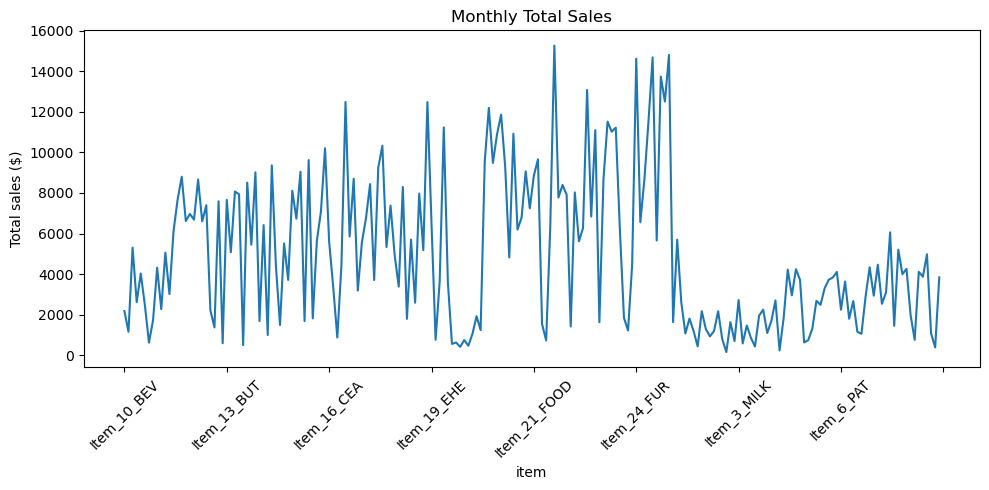

In [54]:
monthly_sales = df.groupby('item')['total_spent'].sum()
monthly_sales.plot(kind='line', title='Monthly Total Sales', figsize=(10,5))
plt.ylabel('Total sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
df.columns

Index(['transaction_id', 'customer_id', 'category', 'item', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location',
       'transaction_date', 'discount_applied', 'month'],
      dtype='object')

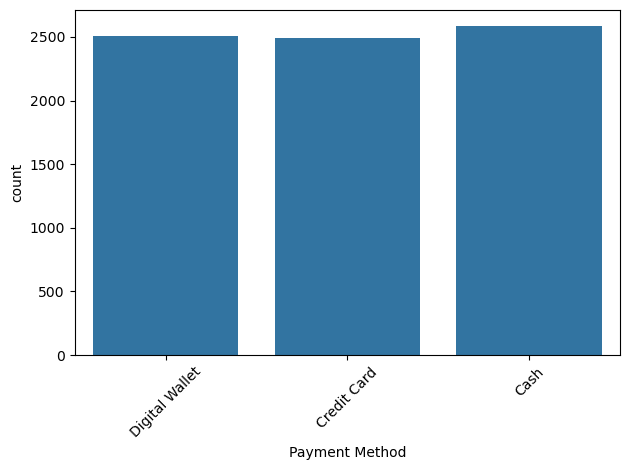

In [59]:
sns.countplot(data=df, x='payment_method')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()